<a href="https://colab.research.google.com/github/asupraja3/ml-ng-notebooks/blob/main/DecisionBoundary_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Optional Lab: Logistic Regression — Decision Boundary

*Adapted, self‑contained notebook inspired by Andrew Ng's Machine Learning Specialization.*

## Goals
In this lab you will:
- Plot the **decision boundary** for a logistic regression model to better understand what the model is predicting.
- See both a **linear** and a **non-linear** decision boundary example.


In [1]:

# === Setup ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

np.set_printoptions(precision=3, suppress=True)



## Dataset

We'll use a tiny 2D dataset with labels \(y\in\{0,1\}\). Each row of `X` is \([x_0, x_1]\).  
Red 'x' will indicate `y=1`, blue circles `y=0` (as in the course).


In [2]:

# --- Toy 2D dataset (astype to float for numerical routines) ---
X = np.array([
    [0.5, 1.5],
    [1.0, 1.0],
    [1.5, 0.5],
    [3.5, 0.5],
    [2.0, 2.0],
    [1.0, 2.5]
]).astype(float)
y = np.array([0, 0, 0, 1, 1, 1]).astype(int)

print("X shape:", X.shape, "y shape:", y.shape, "dtypes:", X.dtype, y.dtype)


X shape: (6, 2) y shape: (6,) dtypes: float64 int64


In [3]:

def plot_data(X, y, ax=None, title=None):
    """Scatter plot of 2D data: circles for y=0, x for y=1."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(5,4))
    neg, pos = (y==0), (y==1)
    ax.scatter(X[neg,0], X[neg,1], s=70, facecolors='none', edgecolors='tab:blue', label='y=0')
    ax.scatter(X[pos,0], X[pos,1], s=70, marker='x', color='tab:red', label='y=1')
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    if title:
        ax.set_title(title)
    ax.legend()
    ax.set_xlim(0,4)
    ax.set_ylim(0,3.5)
    return ax



## Refresher: Logistic regression & decision boundary

A logistic regression model predicts

\[ f_{w,b}(x) = g(w^T x + b),\quad g(z)=\frac{1}{1+e^{-z}}. \]

We interpret \(f_{w,b}(x)\) as \(P(y=1\mid x)\). With the usual 0.5 threshold:

- If \(f_{w,b}(x) >= 0.5\) (i.e., \(w^T x + b >= 0\)), predict **1**.  
- Else predict **0**.

Thus, the **decision boundary** is the set of points where \(w^T x + b = 0\). In 2D, this is a **line**.



### Plotting a given linear boundary

Consider the example from the lecture: \(w=[1,1],\ b=-3\).  
The boundary equation is \(x_0 + x_1 - 3 = 0\) → a line intersecting axes at 3.


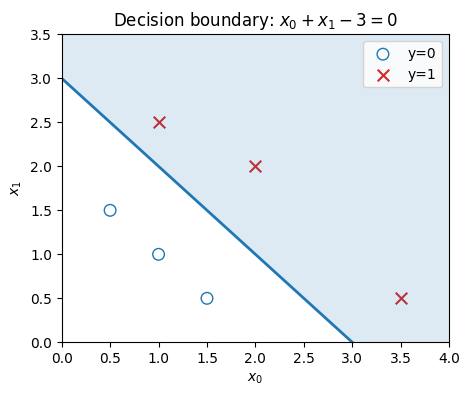

In [4]:

# --- Plot the fixed boundary x0 + x1 - 3 = 0 and shade one side ---
fig, ax = plt.subplots(figsize=(5,4))
plot_data(X, y, ax, title="Decision boundary: $x_0 + x_1 - 3 = 0$")

# x1 = 3 - x0
x0 = np.linspace(0, 4, 200).astype(float)
x1 = 3.0 - x0
ax.plot(x0, x1, linewidth=2)

# Shade the region where w^T x + b >= 0  -> x0 + x1 - 3 >= 0 -> x1 >= 3 - x0
ax.fill_between(x0, x1, 3.5, alpha=0.15)

plt.show()



## Learned boundary from a fitted model

Now let's actually **fit** logistic regression on the dataset and visualize the 0.5 probability contour (i.e., \(w^T x + b=0\)).


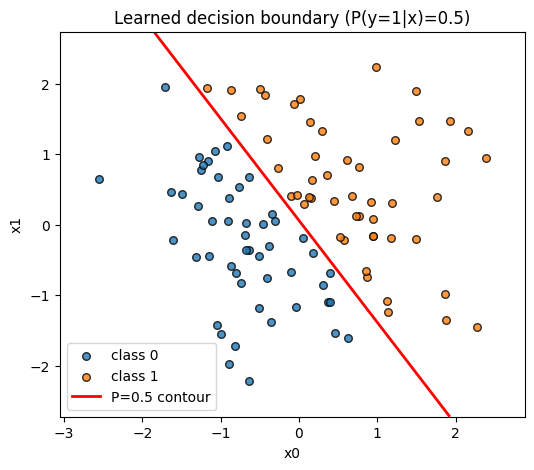

Learned w: [3.207 2.217] b: -0.13931039520412747


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.linear_model import LogisticRegression

# --- toy data (X: 2 features, y: 0/1) ---
# replace these with your real X, y
rng = np.random.RandomState(0)
X = rng.randn(100, 2)
y = (X[:,0] + 0.7*X[:,1] > 0).astype(int)

# def plot_data(X, y, ax, title=""):
#     """Scatter-plot two classes with different markers/colors."""
#     ax.scatter(X[y==0, 0], X[y==0, 1], s=30, edgecolor='k', alpha=0.8, label='class 0')
#     ax.scatter(X[y==1, 0], X[y==1, 1], s=30, edgecolor='k', alpha=0.8, label='class 1')
#     ax.set_xlabel("x0"); ax.set_ylabel("x1"); ax.set_title(title)
#     ax.legend(loc="best")

# --- 1) Fit logistic regression ---
clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y)

# --- 2) Build a grid & compute P(y=1|x) over the grid ---
x0_range = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300)
x1_range = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300)
xx0, xx1 = np.meshgrid(x0_range, x1_range)

grid = np.c_[xx0.ravel(), xx1.ravel()].astype(float)
probs = clf.predict_proba(grid)[:, 1].reshape(xx0.shape)

# --- 3) Plot data and P=0.5 contour (decision boundary) ---
fig, ax = plt.subplots(figsize=(6, 5))
plot_data(X, y, ax, title="Learned decision boundary (P(y=1|x)=0.5)")

# Draw the 0.5 contour (don’t pass 'label' here; contour ignores it)
cs = ax.contour(xx0, xx1, probs, levels=[0.5], linewidths=2, colors='red')

# Create a proxy artist for the legend (avoids cs.collections issues)
proxy = Line2D([0], [0], color='red', lw=2, linestyle='-')
# Add to the *existing* legend handles (from plot_data) if present
handles, labels = ax.get_legend_handles_labels()
handles.append(proxy); labels.append('P=0.5 contour')
ax.legend(handles, labels, loc="best")

plt.show()

# --- 4) Inspect learned parameters ---
print("Learned w:", clf.coef_[0], "b:", clf.intercept_[0])



## Non-linear decision boundary (feature mapping idea)

Sometimes a straight line can't separate the classes. If we define
\(z = x_0^2 + x_1^2 - 1\) and use \(g(z)\), the decision boundary \(z=0\) is a **circle** of radius 1:

\[ x_0^2 + x_1^2 = 1. \]

Below we just **plot** that boundary to illustrate the idea.


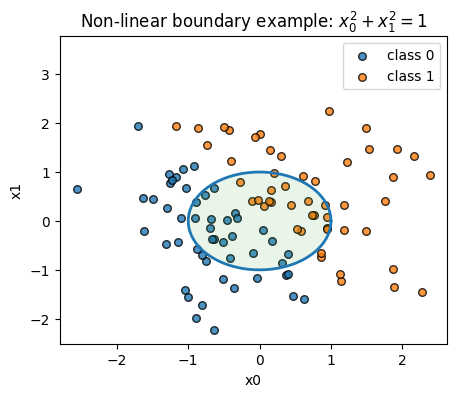

In [10]:

# --- Plot a circular boundary: x0^2 + x1^2 = 1 ---
theta = np.linspace(0, 2*np.pi, 400).astype(float)
circle_x = np.cos(theta) * 1.0 + 0.0
circle_y = np.sin(theta) * 1.0 + 0.0

fig, ax = plt.subplots(figsize=(5,4))
plot_data(X, y, ax, title="Non-linear boundary example: $x_0^2 + x_1^2 = 1$")
ax.plot(circle_x, circle_y, linewidth=2)
# Shade outside region (ŷ=1 side if z >= 0)
ax.fill_between(circle_x, circle_y, 3.5, alpha=0.1)
plt.show()

# Note: To actually *learn* such a boundary with logistic regression,
# you can expand features (e.g., [x0, x1, x0^2, x1^2, x0*x1, ...]) and fit.



## Notes / Takeaways

- The **decision boundary** for logistic regression with a 0.5 threshold is where \(w^T x + b = 0\).  
- In 2D, a linear model yields a **line**; with feature mapping (polynomials), you can model **curves** like circles.  
- Plotting the boundary helps debug model behavior and understand what regions are classified as positive vs negative.

**Try this:**
1. Move one or two points in `X` and re-fit; watch how the learned 0.5 contour moves.  
2. Add polynomial features and let logistic regression learn a circular/curvy boundary.  
3. Change thresholds (0.3/0.7) and see how the decision region changes.
